<a href="https://colab.research.google.com/github/melihkurtaran/DNA_hackathon/blob/numpy/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install gif2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for gif2numpy: filename=gif2numpy-1.3-py2.py3-none-any.whl size=8392 sha256=9efd555d0f85be6673c6f51dd199a974ba942d1f8fc51a1753c2e55492fcb32f
  Stored in directory: /root/.cache/pip/wheels/7d/70/75/7e42205c427015e223944d47ea89e01dc779fb49ba664fb743
Successfully built gif2numpy


In [4]:
import gif2numpy
import cv2
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image,ImageDraw

%matplotlib inline
import numpy as np
import os

In [5]:
workdir = '/content/drive/MyDrive/EDISS Winter School/EDISS_winter_school/'
data_path = workdir + '/data/aemet/10min/'
yaml_path = workdir + 'radars.yaml'

In [6]:
os.listdir(data_path+'/va/20220219')

['aemet_va_202202190010.gif',
 'aemet_va_202202190000.gif',
 'aemet_va_202202190040.gif',
 'aemet_va_202202190030.gif',
 'aemet_va_202202190020.gif',
 'aemet_va_202202190050.gif',
 'aemet_va_202202190130.gif',
 'aemet_va_202202190100.gif',
 'aemet_va_202202190110.gif',
 'aemet_va_202202190120.gif',
 'aemet_va_202202190200.gif',
 'aemet_va_202202190220.gif',
 'aemet_va_202202190150.gif',
 'aemet_va_202202190210.gif',
 'aemet_va_202202190140.gif',
 'aemet_va_202202190310.gif',
 'aemet_va_202202190300.gif',
 'aemet_va_202202190250.gif',
 'aemet_va_202202190240.gif',
 'aemet_va_202202190230.gif',
 'aemet_va_202202190320.gif',
 'aemet_va_202202190340.gif',
 'aemet_va_202202190400.gif',
 'aemet_va_202202190350.gif',
 'aemet_va_202202190330.gif',
 'aemet_va_202202190430.gif',
 'aemet_va_202202190440.gif',
 'aemet_va_202202190450.gif',
 'aemet_va_202202190420.gif',
 'aemet_va_202202190410.gif',
 'aemet_va_202202190530.gif',
 'aemet_va_202202190500.gif',
 'aemet_va_202202190540.gif',
 'aemet_va

In [7]:

np_frames, extensions, image_specifications = gif2numpy.convert(data_path+'va/20220219/aemet_va_202202190010.gif')

In [8]:

the_frame = np.array(np_frames[0])

In [12]:
print(the_frame.shape)

(530, 480, 3)


In [9]:
h=the_frame.shape[0]
w=the_frame.shape[1]

the_frame =  the_frame[:w,:,:]
the_frame = cv2.cvtColor(the_frame, cv2.COLOR_BGR2RGB)

print(the_frame.shape)

(480, 480, 3)


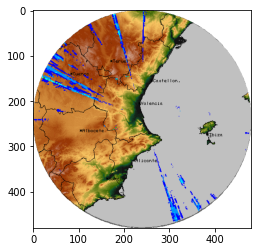

In [10]:
the_frame_pil = Image.fromarray(the_frame)
alpha = Image.new('L', (the_frame.shape[0],the_frame.shape[1]),0)
draw = ImageDraw.Draw(alpha)
draw.pieslice([0,0,w,w],0,360, fill=255)
npAlpha=np.array(alpha)

the_frame_ed =np.dstack((the_frame,npAlpha))
imshow(the_frame_ed)

In [11]:
import yaml
from yaml.loader import SafeLoader

# Open the file and load the file
with open(yaml_path) as f:
    data = yaml.load(f, Loader=SafeLoader)
    print(data)

{'metadata': {'RADAR_CODE': {'rdr_code': {'type': 'string', 'lenght': 2}, 'latitude': {'type': 'decimal', 'units': 'degrees'}, 'longitude': {'type': 'decimal', 'units': 'degrees'}, 'radius': {'type': 'integer', 'units': 'km'}, 'name': {'type': 'string'}}}, 'data': {'CC': {'rdr_code': 'cc', 'latitude': 39.42882, 'longitude': -6.28538, 'radius': 240, 'name': 'Cáceres'}, 'VA': {'rdr_code': 'va', 'latitude': 39.17629, 'longitude': -0.25102, 'radius': 240, 'name': 'Valencia'}, 'CO': {'rdr_code': 'co', 'latitude': 43.16902, 'longitude': -8.52691, 'radius': 240, 'name': 'Coruña'}, 'CA': {'rdr_code': 'ca', 'latitude': 28.01878, 'longitude': -15.6145, 'radius': 240, 'name': 'Canarias'}, 'SE': {'rdr_code': 'se', 'latitude': 37.68743, 'longitude': -6.33447, 'radius': 240, 'name': 'Sevilla'}, 'MU': {'rdr_code': 'mu', 'latitude': 38.26438, 'longitude': -1.18954, 'radius': 240, 'name': 'Murcia'}, 'ML': {'rdr_code': 'ml', 'latitude': 36.61344, 'longitude': -4.65936, 'radius': 240, 'name': 'Málaga'}, 

In [12]:
ba_data = data['data']['BA']
ba_data

{'rdr_code': 'ba',
 'latitude': 41.4082,
 'longitude': 1.88499,
 'radius': 240,
 'name': 'Barcelona'}

Latitude: 1 deg = 110.574 km. Longitude: 1 deg = 111.320*cos(latitude) km.

In [17]:
frame_lat_diff = (1/110.574)
frame_long_diff = 1/(111.320*np.cos(ba_data['latitude']))

In [18]:
longitude_leftmost = ba_data['longitude'] - (w/2)*frame_long_diff
longitude_rightmost = ba_data['longitude'] + (w/2)*frame_long_diff

In [20]:
latitude_leftmost = ba_data['latitude'] - (h/2)*frame_lat_diff
latitude_rightmost = ba_data['latitude'] + (h/2)*frame_lat_diff

In [21]:
print(longitude_leftmost, longitude_rightmost, latitude_leftmost, latitude_rightmost)

4.441701804375512 -0.671721804375512 39.01161490766365 43.80478509233635


In [13]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans 
from matplotlib import colors
from collections import Counter
import matplotlib.pyplot as plt 

In [14]:
def get_sensor_mask(img):
  # color pallete in bgr
  sensor_color_list = [[0, 255, 255],[0, 192, 0],[0, 255, 0],[0, 127, 255],[90, 0, 200],[252, 0, 0],[252, 148, 0],[252, 252, 0],[35, 131, 67],[0, 187, 255],[0, 0, 255]]
  mask_img = np.zeros(img.shape, dtype='uint8')
  for row_i in range(img.shape[0]):
    for pixel_i in range(img.shape[1]):
      if list(img[row_i, pixel_i]) in sensor_color_list:              
        mask_img[row_i, pixel_i] = img[row_i, pixel_i]
  return mask_img


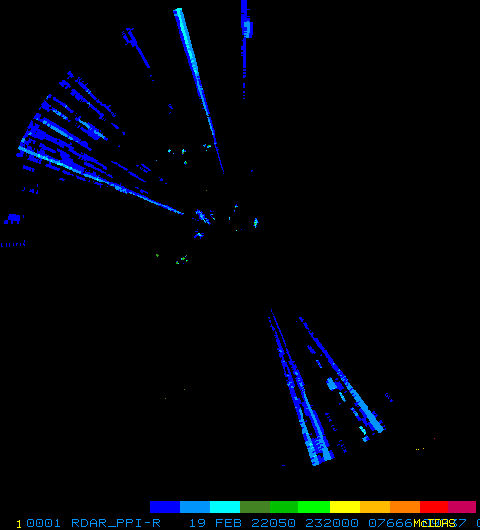

In [15]:
np_frames, extensions, image_specifications = gif2numpy.convert(data_path+'va/20220219/aemet_va_202202192320.gif')
im2 = get_sensor_mask(np.array(np_frames[0]))
cv2_imshow(im2)

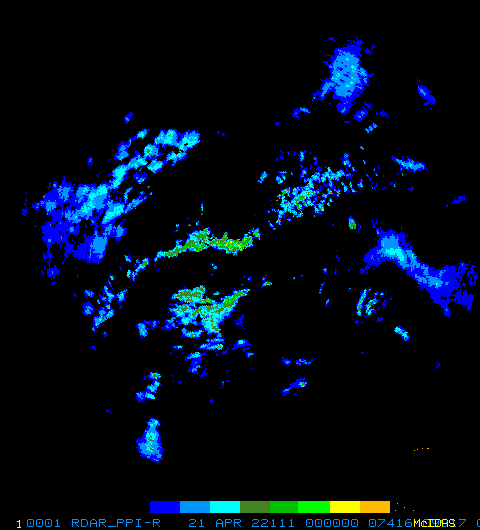

In [16]:
np_frames, extensions, image_specifications = gif2numpy.convert(data_path+'ba/20220421/aemet_ba_202204210000.gif')
_img = get_sensor_mask(np.array(np_frames[0]))
cv2_imshow(_img)

#Pixel location distribution

In [17]:
dist_img = _img

In [18]:
dist_img.shape

(530, 480, 3)

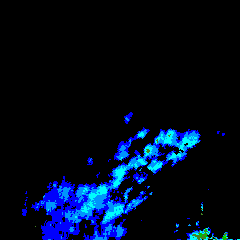

In [19]:
dist_img_clust = dist_img[:240, :240]
cv2_imshow(dist_img_clust)

In [20]:
dist_img_clust.shape

(240, 240, 3)

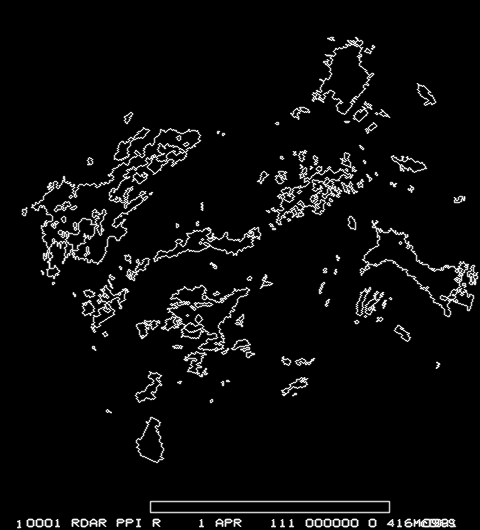

In [21]:
gray_clust = cv2.cvtColor(dist_img, cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(gray_clust, 0, 255, cv2.THRESH_BINARY)

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours6, hierarchy = cv2.findContours(image=thresh2, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_NONE)
sorted_contours6 = sorted(contours6, key=cv.contourArea,reverse=True)
image_copy6 = np.zeros(thresh2.shape, dtype='uint8')
cv2.drawContours(image_copy6, sorted_contours6[:300], -1, (255, 255, 255), 1, cv2.LINE_AA)


cv2_imshow(image_copy6)

In [22]:
sorted_contours6 = sorted(contours6, key=cv.contourArea,reverse=True)
len(sorted_contours6)

504

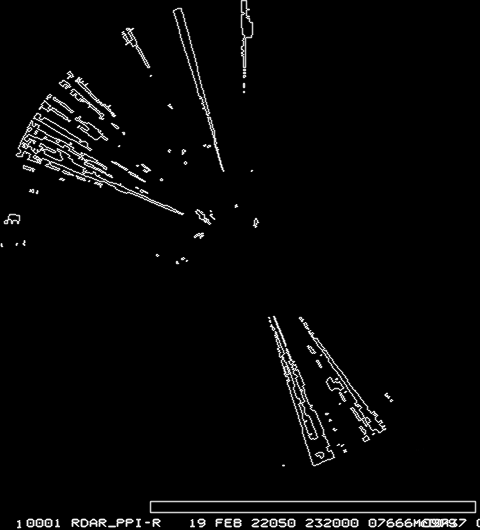

In [23]:
gray_im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
ret3, thresh3 = cv2.threshold(gray_im2, 0, 255, cv2.THRESH_BINARY)

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours7, hierarchy7 = cv2.findContours(image=thresh3, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_NONE)
sorted_contours7 = sorted(contours7, key=cv.contourArea,reverse=True)
image_copy7 = np.zeros(thresh3.shape, dtype='uint8')
cv2.drawContours(image_copy7, sorted_contours7[:-50], -1, (255, 255, 255), 1, cv2.LINE_AA)


cv2_imshow(image_copy7)

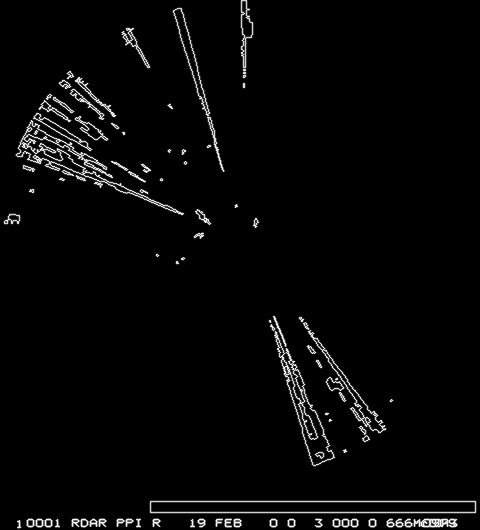

In [24]:
image_copy8 = np.zeros(thresh3.shape, dtype='uint8')
cv2.drawContours(image_copy8, sorted_contours7[:-100], -1, (255, 255, 255), 1, cv2.LINE_AA)
cv2_imshow(image_copy8)

In [25]:
image_copy8.shape

(530, 480)

In [1]:
import pandas as pd

In [35]:
def create_training_set(sorted_contours, is_noise):
  for i in range(len(sorted_contours)-1):
    image_copy = np.zeros((530,480), dtype='uint8')
    cv2.drawContours(image_copy, sorted_contours[i:i+1], -1, (255, 255, 255), 1, cv2.LINE_AA)
    if(is_noise):
      cv2.imwrite('/content/drive/MyDrive/EDISS Winter School/contour_det_data/training/noise/cont_'+str(i)+'.jpg', image_copy)
    else:
      cv2.imwrite('/content/drive/MyDrive/EDISS Winter School/contour_det_data/training/cloud/cont_'+str(i)+'.jpg', image_copy)
    

In [36]:
create_training_set(sorted_contours7[:-100], True)
create_training_set(sorted_contours6[:-100], False)

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [ ]:
cloud_count = len(os.listdir('/content/drive/MyDrive/EDISS Winter School/contour_det_data/training/cloud/'))
df = pd.DataFrame(data={'img': os.listdir('/content/drive/MyDrive/EDISS Winter School/contour_det_data/training/cloud/'), 'y': np.zeros(cloud_count)})
df. os.listdir('/content/drive/MyDrive/EDISS Winter School/contour_det_data/training/noise/')

In [ ]:
X_train = os.listdir('/content/drive/MyDrive/EDISS Winter School/contour_det_data/training/cloud/')
X_test = 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

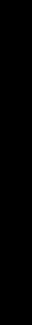

In [137]:
min_w = image_copy8.shape[1]
max_w = 0
min_h = image_copy8.shape[0]
max_h = 0
for p in sorted_contours7[0]:
  if p[0][0] > max_h:
    max_h = p[0][0]
  if p[0][0] < min_h:
    min_h = p[0][0]
  if p[0][1] < min_w:
    min_w = p[0][1]
  if p[0][1] > max_w:
    max_w = p[0][1]
  

In [131]:
sorted_contours7[0][0][0][0]

150



---



In [15]:
the_frame_full = np.array(np_frames[0])

In [94]:
legend_bottom = the_frame_full[w+21:h-17, 150:w-4, :]
b_legend_image = cv2.cvtColor(legend_bottom, cv2.COLOR_BGR2RGB)
cv2_imshow(b_legend_image)

In [90]:
cv2_imshow(legend_bottom)

In [92]:
b_legend_image[2, 10]

array([  0,   0, 252], dtype=uint8)

In [100]:
flat_legend_bottom = legend_bottom.reshape(legend_bottom.shape[0]*legend_bottom.shape[1], 3)
flat_legend_bottom

array([[252,   0,   0],
       [252,   0,   0],
       [252,   0,   0],
       ...,
       [ 90,   0, 200],
       [ 90,   0, 200],
       [ 90,   0, 200]], dtype=uint8)

In [104]:
legend_bottom_list = [list(t) for t in set(tuple(element) for element in flat_legend_bottom)]
legend_bottom_list

[[0, 255, 255],
 [0, 192, 0],
 [0, 255, 0],
 [0, 127, 255],
 [90, 0, 200],
 [252, 0, 0],
 [252, 148, 0],
 [252, 252, 0],
 [35, 131, 67],
 [0, 187, 255],
 [0, 0, 255]]

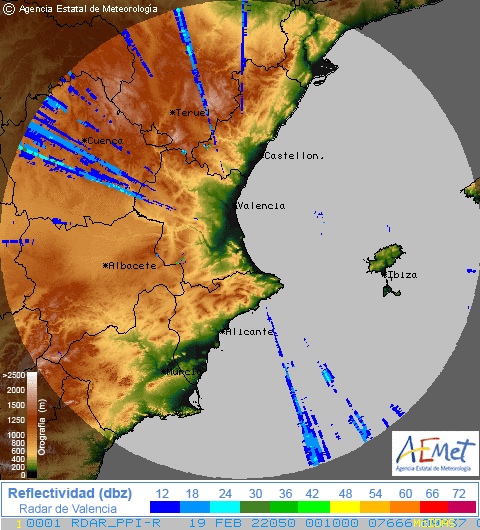

In [122]:
image_frame = np.array(np_frames[0])
cv2_imshow(image_frame)

In [123]:
updated_frame = np.empty(image_frame.shape)

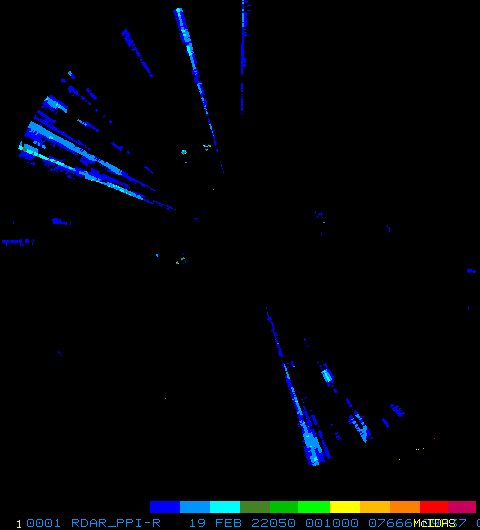

In [124]:
for row_i in range(image_frame.shape[0]):
  for pixel_i in range(image_frame.shape[1]):
    if list(image_frame[row_i, pixel_i]) not in legend_bottom_list:
      updated_frame[row_i, pixel_i] = [0,0,0]
    else:
      updated_frame[row_i, pixel_i] = image_frame[row_i, pixel_i]

cv2_imshow(updated_frame)

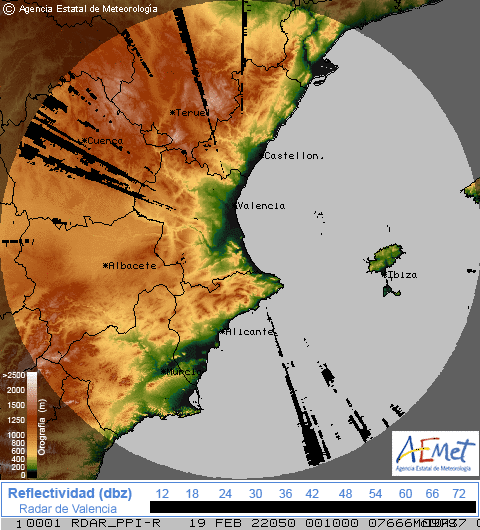

In [126]:
subtracted_img = image_frame - updated_frame
cv2_imshow(subtracted_img)